### Dimensionality Reduction Techniques
#### Principal Component Analysis & t-SNE

#### Load Data

In [1]:
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns=['sepal_length', 'sepal_width', 'petal_length','petal_width','class']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
#Prepare source and target variables
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

#### Standardize the data
Standardize the data for zero mean and unit variance of features

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

#### Covariance Matrix

In [5]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = np.cov(x_std.T)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [6]:
eig_vals, eig_vects = np.linalg.eig(cov_mat)

print('Eigen Vectors: \n%s' %eig_vects)
print('\nEigen Values: \n%s' %eig_vals)

Eigen Vectors: 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigen Values: 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


#### Correlation Matrix

In [7]:
cor_mat1 = np.corrcoef(x_std.T)
eig_vals, eig_vects = np.linalg.eig(cor_mat1)
print('Eigen Vectors: \n%s' %eig_vects)
print('\nEigen Values: \n%s' %eig_vals)

Eigen Vectors: 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigen Values: 
[ 2.91081808  0.92122093  0.14735328  0.02060771]


##### Observation:
We observe that both Covariance and Correlation Matrix generate same set of Eigen Vectors and Eigen Values

#### Selecting Principal Components

In [8]:
for ev in eig_vects:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vects[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)

[(2.910818083752051, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.92122093070722422, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.14735327830509581, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.020607707235624998, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]


In [10]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.91081808375
0.921220930707
0.147353278305
0.0206077072356


#### Explained Variance

https://en.wikipedia.org/wiki/Explained_variation

In the context of PCA, the explained variance tells us how much information (i.e., variance) can be attributed to each of the principal components.

In [11]:
tot = sum(eig_vals)
exp_var = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_exp_var = np.cumsum(exp_var)

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

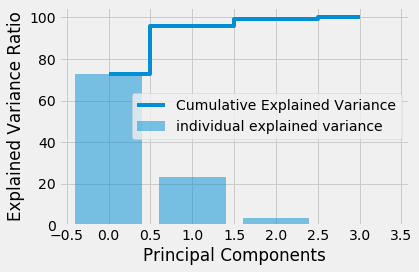

In [13]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), exp_var, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_exp_var, where='mid',
             label='Cumulative Explained Variance')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

In [14]:
print('From the above plot we observe that the first two principal component has more explained variance combined (i.e., around {}) and last two has negligible explained variance of {}.'.format(exp_var[0]+exp_var[1],exp_var[2]+exp_var[3]))

From the above plot we observe that the first two principal component has more explained variance combined (i.e., around 95.80097536148199) and last two has negligible explained variance of 4.199024638518024.


#### Projection Matrix
A matrix of our concatenated top k eigenvectors

In [15]:
W=eig_vects[:,:2]

In [16]:
W

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [17]:
Y = x_std.dot(W)

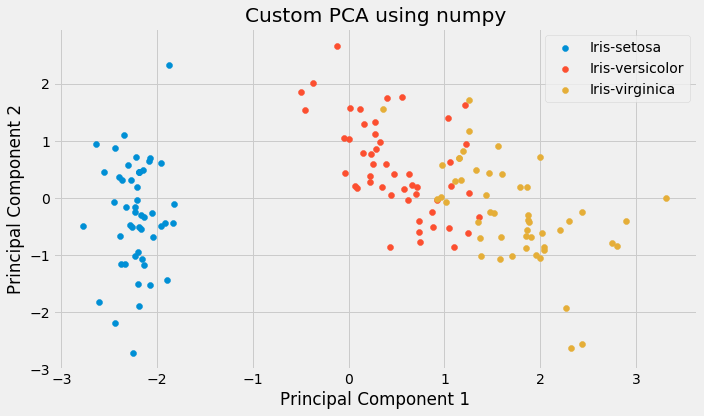

In [18]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('darkred', 'green', 'magenta')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.title('Custom PCA using numpy')
    plt.tight_layout()
    plt.show()

##### Observation:

We observe that after applying PCA the dataset has two principal components thus transforming to 2 dimensional subspace from 3 dimensional subspace

In [24]:
from sklearn.manifold import TSNE
t_sne=TSNE(n_components=2,perplexity=20).fit_transform(x_std)
t_sne.shape

(150, 2)

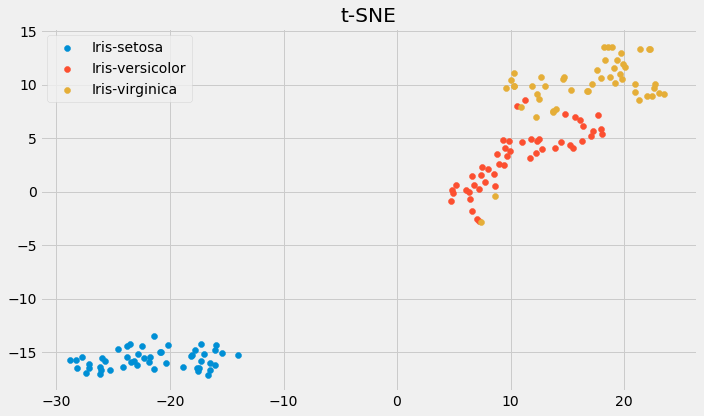

In [25]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('darkred', 'green', 'magenta')):
        plt.scatter(t_sne[y==lab, 0], 
                    t_sne[y==lab, 1],
                    label=lab)
    plt.legend(loc='best')
    plt.title('t-SNE')
    plt.tight_layout()
    plt.show()

# PCA & t-SNE for SwissRole dataset

#### Load and Standardize the data

In [28]:
from sklearn import datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=150)
x_std = StandardScaler().fit_transform(X)

#### Covariance Matrix

In [29]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = np.cov(x_std.T)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.00704083  0.15439109]
 [-0.00704083  1.00671141 -0.00747187]
 [ 0.15439109 -0.00747187  1.00671141]]


In [30]:
eig_vals, eig_vects = np.linalg.eig(cov_mat)

print('Eigen Vectors: \n%s' %eig_vects)
print('\nEigen Values: \n%s' %eig_vals)

Eigen Vectors: 
[[ 0.70551752 -0.7070589   0.04809096]
 [-0.06603235  0.00197852  0.99781552]
 [ 0.70560949  0.70715189  0.04529288]]

Eigen Values: 
[ 1.16178161  0.85231971  1.0060329 ]


#### Correlation Matrix

In [31]:
cor_mat1 = np.corrcoef(x_std.T)
eig_vals, eig_vects = np.linalg.eig(cor_mat1)
print('Eigen Vectors: \n%s' %eig_vects)
print('\nEigen Values: \n%s' %eig_vals)

Eigen Vectors: 
[[ 0.70551752 -0.7070589   0.04809096]
 [-0.06603235  0.00197852  0.99781552]
 [ 0.70560949  0.70715189  0.04529288]]

Eigen Values: 
[ 1.1540364   0.84663758  0.99932602]


#### Selecting Principal Components

In [32]:
for ev in eig_vects:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [33]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vects[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)

[(1.1540364015441751, array([ 0.70551752, -0.06603235,  0.70560949])), (0.84663757997966138, array([-0.7070589 ,  0.00197852,  0.70715189])), (0.99932601847616298, array([ 0.04809096,  0.99781552,  0.04529288]))]


In [34]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.15403640154
0.999326018476
0.84663757998


#### Explained Variance

In [35]:
tot = sum(eig_vals)
exp_var = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_exp_var = np.cumsum(exp_var)

In [43]:
exp_var

[38.467880051472513, 33.310867282538773, 28.221252665988722]

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline

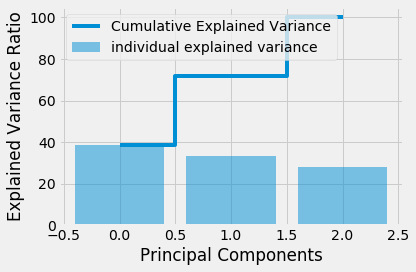

In [47]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(3), exp_var, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(3), cum_exp_var, where='mid',
             label='Cumulative Explained Variance')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

In [65]:
print('From the above plot we observe that all the three component are having explained variance with very less variation from other viz., {}, {} and {}.'.format(exp_var[0], exp_var[1],exp_var[2]))

From the above plot we observe that all the three component are having explained variance with very less variation from other viz., 38.46788005147251, 33.31086728253877 and 28.22125266598872.


#### Projection Matrix

In [50]:
W=eig_vects[:,:2]

In [52]:
W

array([[ 0.70551752, -0.7070589 ],
       [-0.06603235,  0.00197852],
       [ 0.70560949,  0.70715189]])

In [53]:
Y = x_std.dot(W)

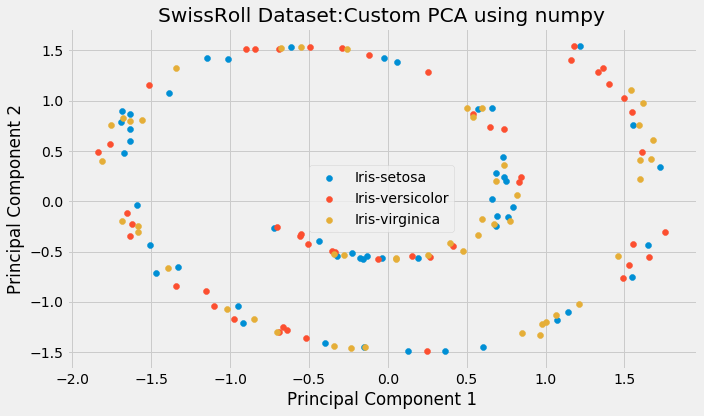

In [54]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('darkred', 'green', 'magenta')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.title('SwissRoll Dataset:Custom PCA using numpy')
    plt.tight_layout()
    plt.show()

###### Lets plot the swiss roll data as is without any modification 

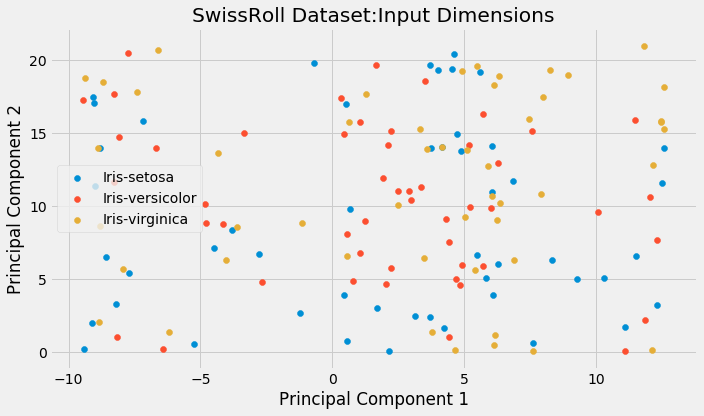

In [63]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('darkred', 'green', 'magenta')):
        plt.scatter(X[y==lab, 0],
                    X[y==lab, 1],
                    label=lab)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.title('SwissRoll Dataset:Input Dimensions')
    plt.tight_layout()
    plt.show()

In [59]:
t_sne=TSNE(n_components=2,perplexity=80).fit_transform(x_std)
t_sne.shape

(150, 2)

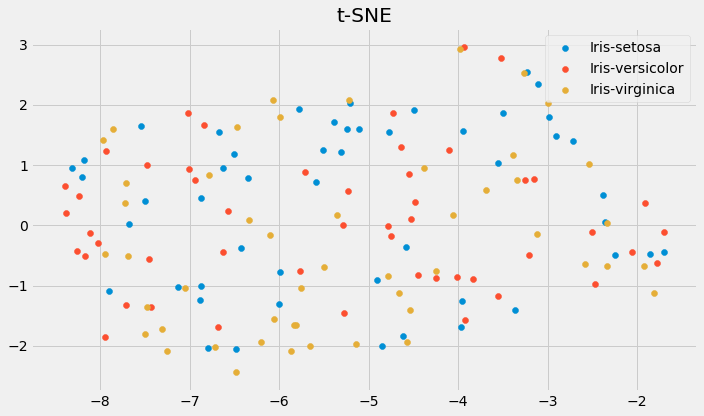

In [60]:
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(10, 6))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('darkred', 'green', 'magenta')):
        plt.scatter(t_sne[y==lab, 0], 
                    t_sne[y==lab, 1],
                    label=lab)
    plt.legend(loc='best')
    plt.title('t-SNE')
    plt.tight_layout()
    plt.show()

#### Observations and Inference

From the PCA plot and t-SNE plots of Swiss roll dataset it is evident that the manifold dataset cannot be further decomposed to lesser dimensions given 3 input features in the dataset.

Also it is evident that from the t-SNE plot and Swiss Roll Dataset : input Dimensions plot we see that the dimensions cannot be reduced to a further level.